# Project 1

Authors: Naomi Buell and Richie Rivera

## Instructions

*For your first project, you are asked to*

*1. Identify and load a network dataset that has some categorical information available for each node.*

*2. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.*

*3. Compare your centrality measures across your categorical groups.*

*For example, using the dataset from a study of romantic relationships among high school students in Columbus, Ohio [http://researchnews.osu.edu/archive/chains.htm], you might want to determine if there are any differences in your calculated centrality measures between the two sexes.  You might use a t-test or another statistical measure to support your findings.*

## Step 1: Identify and load One Piece interaction network dataset

For this assignment, we use the [One Piece Interaction](https://github.com/jonaszeu/one-piece-interaction-data) dataset from jonaszeu on github. It was created by scraping a wiki of the show and documenting every interaction between two characters and categorizes it into an interaction type (Communication, Confrontation, Cooperation, etc). This dataset is available in a few different ways but we will be using the `.csv` that is created as our data source.

In this dataset, each row corresponds to one interaction (edge) between two characters (nodes). For each node, the available categorical variables are: 
- `Interaction`, which describes the type of interaction between the two characters (e.g. Perception, Communication, Confrontation, Cooperation, Emotional, Indirect, Physical, or Other),
- `Saga`, which describes the saga in which the interaction took place (e.g. East Blue, Alabasta, Sky Island, etc.),
- `Arc`, which describes the smaller story arc in which the interaction took place (e.g. Romance Dawn, Orange Town, Syrup Village, etc.), and
- `Filler`, which indicates whether the interaction took place in a filler episode (True or False).

In this notebook, we load the data described above and calculate characters' degree centrality to predicting whether they are a central character for a given story arc.



Import Libraries: Use NetworkX for graph analysis, pandas for data manipulation, and matplotlib for visualization.



In [5]:
# Import libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

Load the Dataset: Read the CSV file directly from the GitHub repository (using the following url: 'https://raw.githubusercontent.com/jonaszeu/one-piece-interaction-data/refs/heads/main/one_piece_interactions_1-1085.csv') into a pandas DataFrame.



In [6]:
# Load the dataset directly from github
op_url = 'https://raw.githubusercontent.com/jonaszeu/one-piece-interaction-data/refs/heads/main/one_piece_interactions_1-1085.csv'
op_df = pd.read_csv(op_url)

# Make the Character Names "proper"
for e in ['Character 1', 'Character 2']: op_df[e] = op_df[e].str.title()

# Show a sample of the data
op_df.head()

# Get a total number of characters to get all the nodes
op_unique_characters = set(list(op_df['Character 1']) + list(op_df['Character 2']))

# Print information on the dataset
print(f"{op_df.shape[0]:,} Edges\n{len(op_unique_characters):,} Nodes")


28,185 Edges
1,448 Nodes


Visualize the Data: Use NetworkX to visualize the data in a graph, with characters as nodes and interactions as edges, including displaying `Saga` and `Arc` attributes with different colors or shapes, and weighting edges based on interaction frequency.

> NOTE: make this visualization more readable



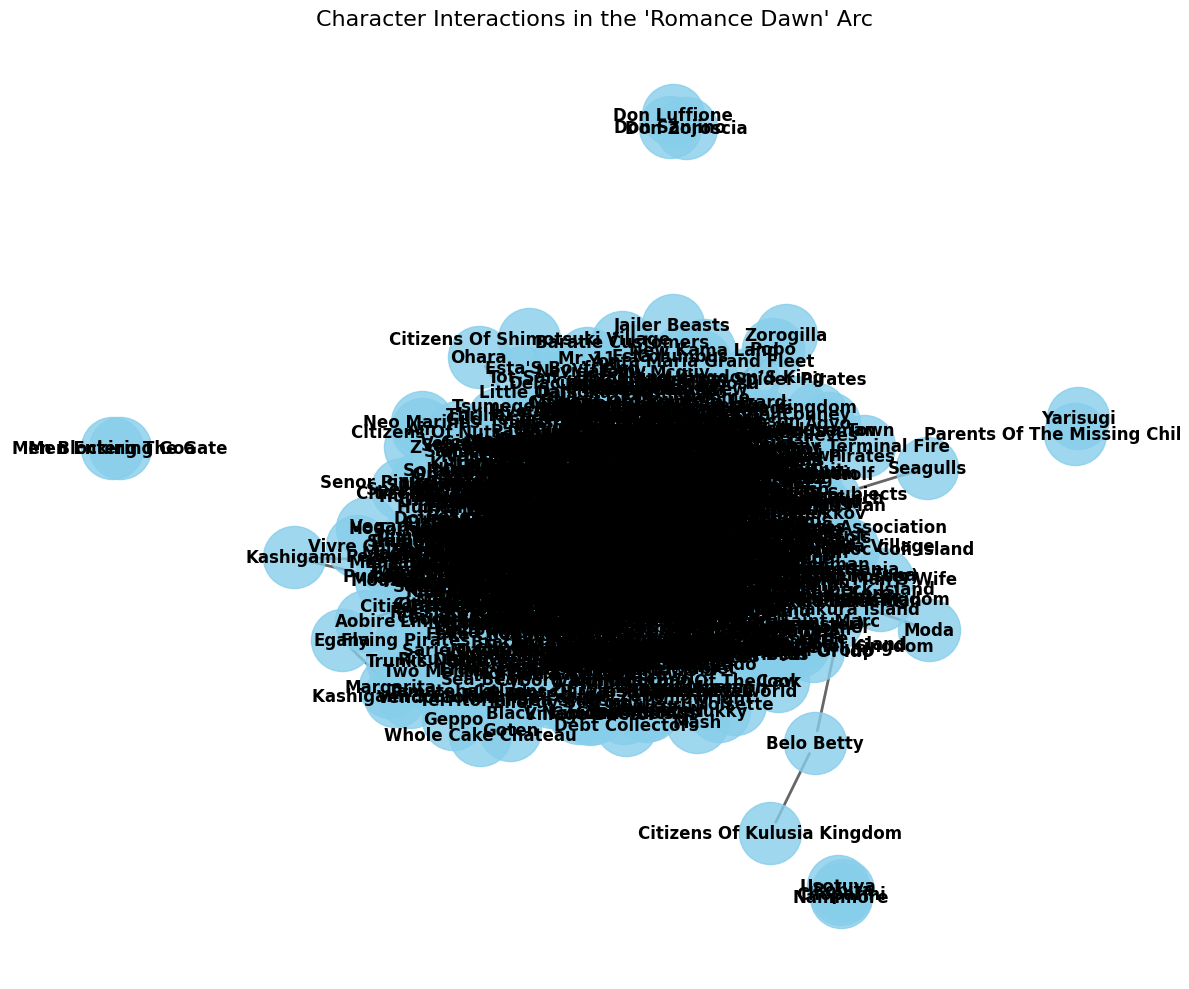

In [7]:
# Intializing the graph
rd_graph = nx.from_pandas_edgelist(
    op_df,
    source = 'Character 1',
    target = 'Character 2',
    edge_attr = ['Episode', 'Interaction', 'Saga', 'Arc', 'Filler']
)
# Set up the figure size
plt.figure(figsize=(12, 10))

# Choose a layout for better node separation
pos = nx.spring_layout(rd_graph, k=0.7, iterations=50) 

# Draw the graph components with custom styling
nx.draw_networkx_nodes(rd_graph, pos, node_size=2000, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(rd_graph, pos, width=2, alpha=0.6, arrows=True, arrowsize=20)
nx.draw_networkx_labels(rd_graph, pos, font_size=12, font_family='sans-serif', font_weight='bold')

plt.title("Character Interactions in the 'Romance Dawn' Arc", size=16)
plt.axis('off')
plt.tight_layout()

# Save the plot as a PNG image before showing it
plt.savefig("rd_graph_plot.png")

plt.show()

## Step 2: Calculate degree centrality and eigenvector centrality


Calculate Degree Centrality with NetworkX: 
- Calculate degree centrality of each node/character using `NetworkX.degree()`.
- Aggregate and group scores across categorical variables `Saga` and `Arc`.
- Aggregate and group scores across `Interaction` to see how characters rely on specific types of communication types (e.g., some characters may solely rely on confrontation).


In [8]:
# Compute degree
deg = nx.degree(rd_graph)
# Sort the degree by value (number of connections), descending
sorted_deg = sorted(deg, key=lambda x: x[1], reverse=True)
print("\nTop 10 Characters by Degree Centrality (Number of Connections):")
sorted_deg[0:9] # Show the top 10 characters by degree


Top 10 Characters by Degree Centrality (Number of Connections):


[('Luffy', 640),
 ('Sanji', 309),
 ('Zoro', 299),
 ('Straw Hat Pirates', 287),
 ('Nami', 265),
 ('Usopp', 237),
 ('Robin', 195),
 ('Chopper', 186),
 ('Franky', 167)]

## Step 3: Compare centrality measures across Saga, Arc, and Interaction type



Determine main characters in each saga and arc: 
- By comparing degree centrality scores we can find out who the main characters are in each saga and arc and how they interact with other main characters.
- By comparing the degree centrality scores across `Interaction`, we can see how characters rely on different communication styles.

## Presentation Video

Link to presentation video: [insert].